### BGU 361-2-2260 
## Introduction to Machine Learning


# Welcome to the course!
***
**Lecturer:** Dr. Nir Shlezinger.  
**Teaching assistants:** Olga Weisman and Ziv Mor.

This tutorial notebook is borrowed from the Technion course 02360766 and was compiled by Ronen Nir and Itay Evron.

***

# Introduction

* Updates & Materials : Moodle   
* Grade
    * 60% - Exam (must pass)
    * 40% - 4 Homework assignments

***

## Introduction to Machine Learning
# Tutorial 1: Data Exploration with Python


# Tutorial outline

* The learning pipeline
* Overview and motivations
* Steps of Data Exploration
    * Variable Identification
    * Univariate Analysis
    * Bi-variate Analysis

***

# The learning pipeline

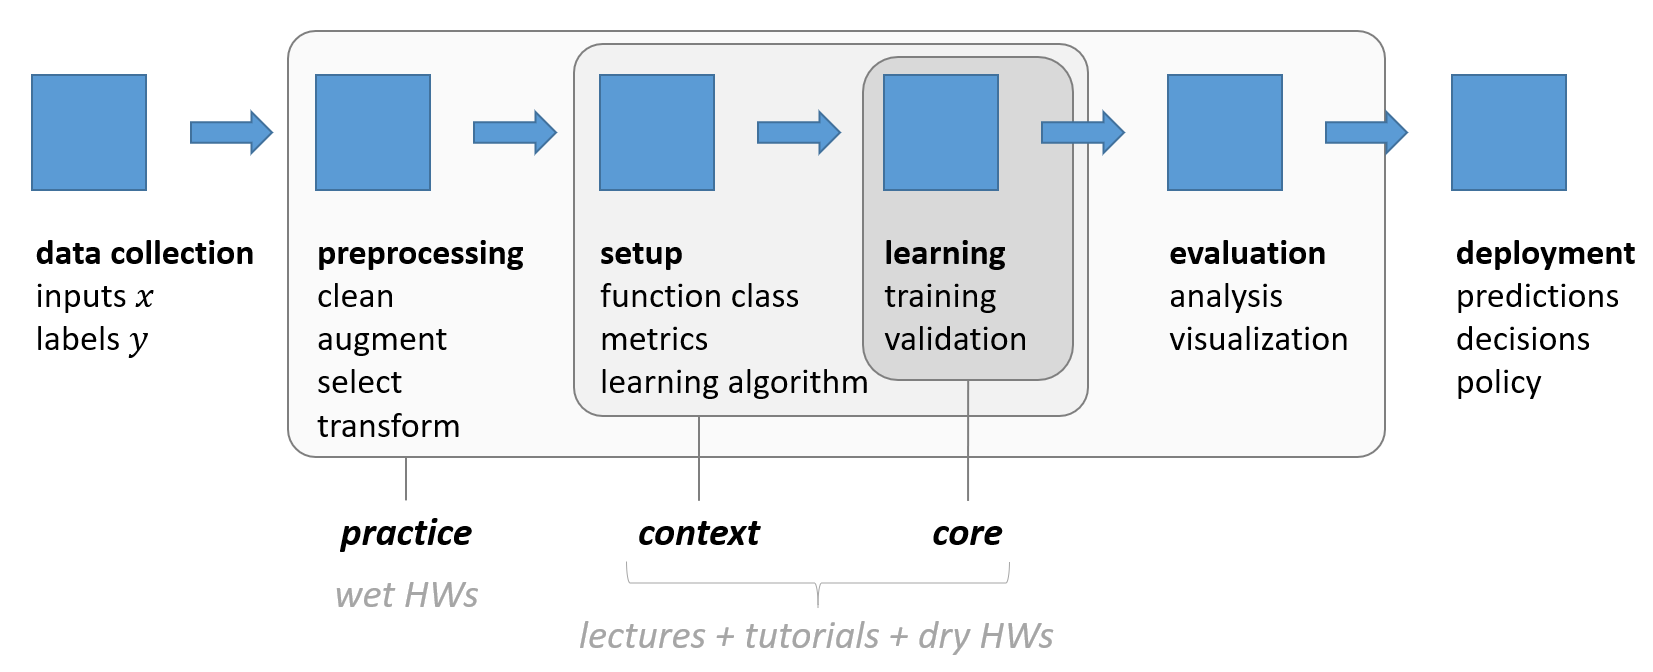

***

# Data Exploration Overview

- Analyze datasets to reveal their main characteristics
- Find what the data can tell us
    - Some patterns can be revealed through visualizations and charts
- Using statistical methods to identify variables

***

# Motivation

- With a new dataset in hand, the first thing you do is data exploration
    - Data exploration and data preparation take up to 80% of the time in many ML projects


- Exploring the data gives insights about what you can and cannot do

- Garbage in, garbage out
    - Exploring the data can help you make it better later on
    - *More data beats cleverer algorithms,  better data beats more data*
        - (Peter Norvig)

***

# Data Exploration Steps

1. Understanding the data
    - Variable Identification
    - Variable Analysis
2. Improving the data
    - Missing values
    - Outliers
    - Variable Engineering

***

# Packages Relevant to Data Exploration
First, import relevant packages.

In [1]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # Numerical computing tools
import seaborn as sns  # visualization library
import matplotlib.pyplot as plt  # another visualization library
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


# Step I: Understanding the Data

Throughout this tutorial we shall use the `tips` dataset for demonstration and examples from [Kaggle's visualization tutorial](https://www.kaggle.com/murats/visualization-with-seaborn-on-tips-dataset-part1).

In [2]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

## Variable Identification

> What do we need to know about the variables in a dataset?

In [25]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Variable Types

We focus on two types of variables:

1. Continuous variables (`total_bill`, `tip`)    
1. Categorical variables (`sex`, `smoker`, `day`, `time`)

### Discussion
> How would you treat the 'size' variable?

In [26]:
tips['size']

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

<Axes: >

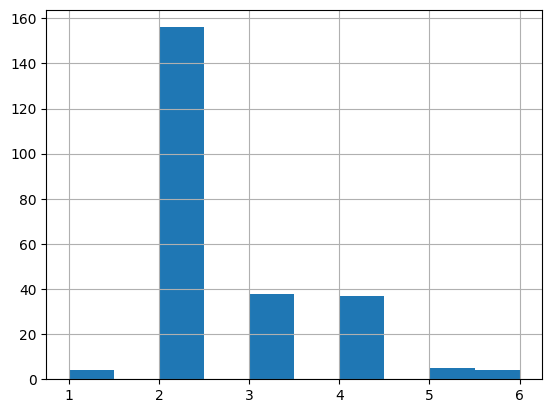

In [5]:
tips['size'].hist()

***

## Features & Target Variables
* Target variables are what we care about, and we want to infer from the features (predictor variables)
* The features are often denoted as $X$ and target variables are denoted $y$

### Discussion
> What variables are the *predictor variables* and what variables are *target variables*?

In [29]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
158,13.39,2.61,Female,No,Sun,Dinner,2
157,25.00,3.75,Female,No,Sun,Dinner,4
209,12.76,2.23,Female,Yes,Sat,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
188,18.15,3.50,Female,Yes,Sun,Dinner,3


***

## Data Understanding - Important Tip
* Pandas assumes a certain variable type to each column
* Doublecheck it with the attribute `dtypes`

In [7]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

***

# Univariate Analysis
Explores the variables one by one
* Continuous variables
    * Use statistical metrics and visualization methods to understand the nature of the variable        
* Categorical variables
    * Tables that describe distribution of each category

## Univariate Analysis (Continuous Variables)

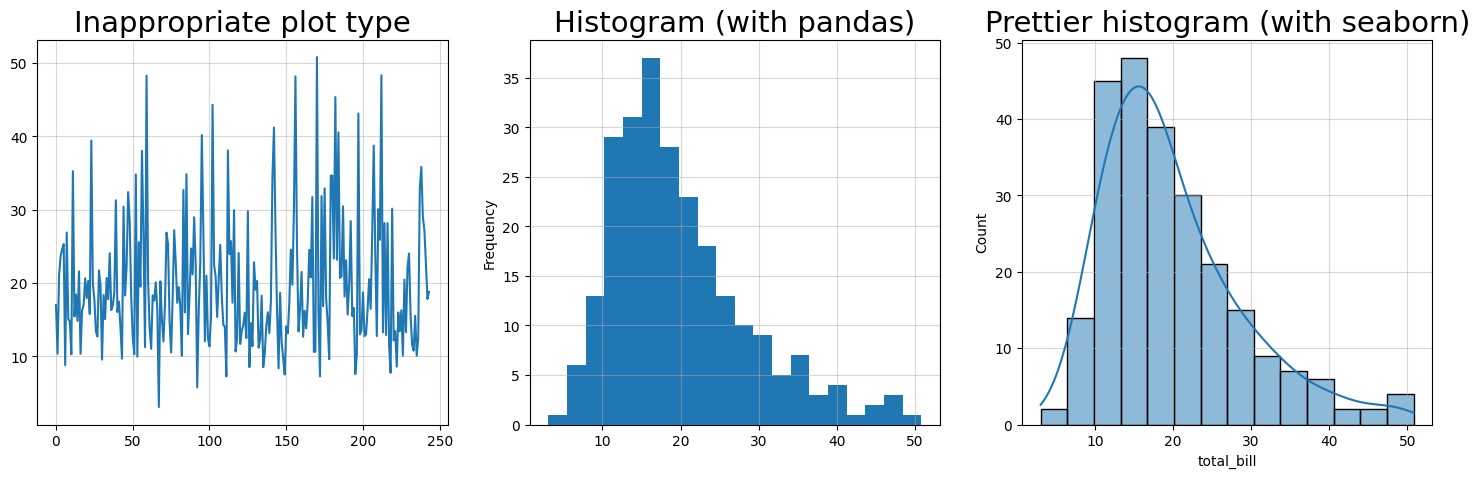

In [8]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))

tips['total_bill'].plot(ax=axes[0])  # don't do that
axes[0].set_title("Inappropriate plot type", fontsize=21)

tips.total_bill.plot(kind='hist', bins=20, ax=axes[1]) # better
axes[1].set_title("Histogram (with pandas)", fontsize=21)

sns.histplot(tips.total_bill, kde=True, ax=axes[2]) # prettier with seaborn
axes[2].set_title("Prettier histogram (with seaborn)", fontsize=21)

for ax in axes:
    ax.grid(alpha=0.5)

## Univariate Analysis (Categorical Variables)

In [9]:
tips['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [10]:
tips.groupby('sex').smoker.value_counts()

sex     smoker
Male    No        97
        Yes       60
Female  No        54
        Yes       33
Name: count, dtype: int64

## Visualization of Categorical Variables

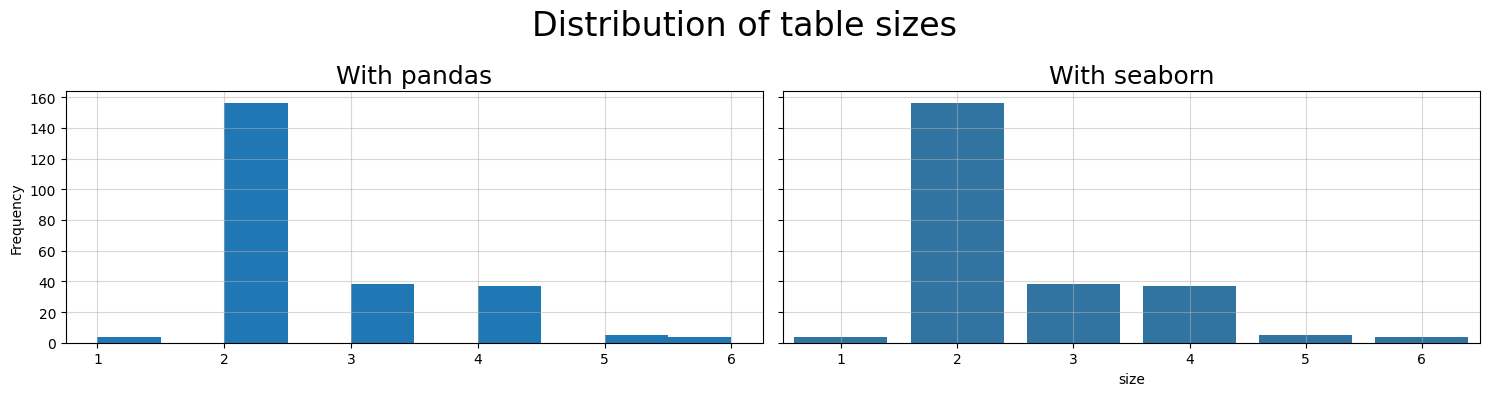

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,4))
tips["size"].plot(kind="hist", ax=ax1) # plot with pandas
ax1.grid(alpha=0.5)
ax1.set_title("With pandas", fontsize=18)

sns.countplot(data = tips, x="size", ax=ax2)  # prettier with seaborn
ax2.grid(alpha=0.5)
ax2.set_title("With seaborn", fontsize=18)

plt.suptitle("Distribution of table sizes", fontsize=24)
_ = plt.tight_layout()

***

# Bi-variate Analysis
Explore the relationship between two variables
1. Continuous and continuous
1. Categorical and continuous
1. Categorical and categorical

***

## Bi-Variate Analysis of 2 Continuous Variables
1. Your first visualization of 2 variables should be a *scatter plot*
    1. Keep it simple!
1. Use statistical methods to check the relationship between two variables
    1. e.g. computing the correlation between 2 variables

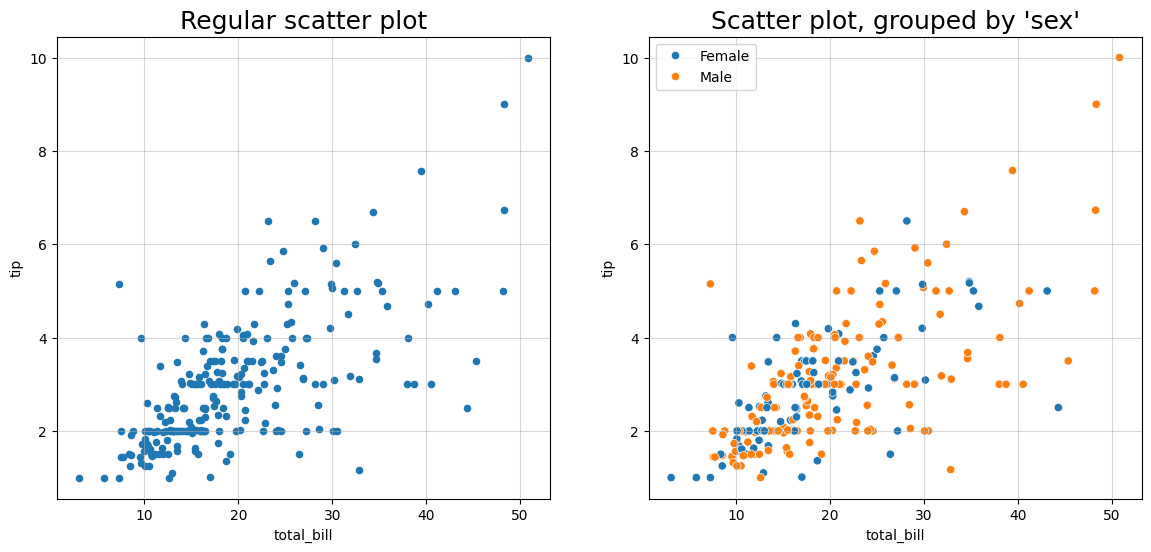

In [12]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))

tips.plot(x='total_bill', y='tip', kind='scatter', ax=axes[0]) # plot with pandas
axes[0].set_title("Regular scatter plot", fontsize=18)

sns.scatterplot(x='total_bill', y='tip', hue=tips.sex.to_list(), data=tips, ax=axes[1]) # prettier with seaborn
axes[1].set_title("Scatter plot, grouped by 'sex'", fontsize=18)

for ax in axes:
    ax.grid(alpha=0.5)

***

## Correlation
- Tests how strongly pairs of variables are *linearly* related
    - For example, height and weight are related
- The Correlation between two variables (X,Y) is defined to be: $\frac{Cov(X,Y)}{\sqrt{Var(X) Var(Y)}}$

Correlation is: 0.676


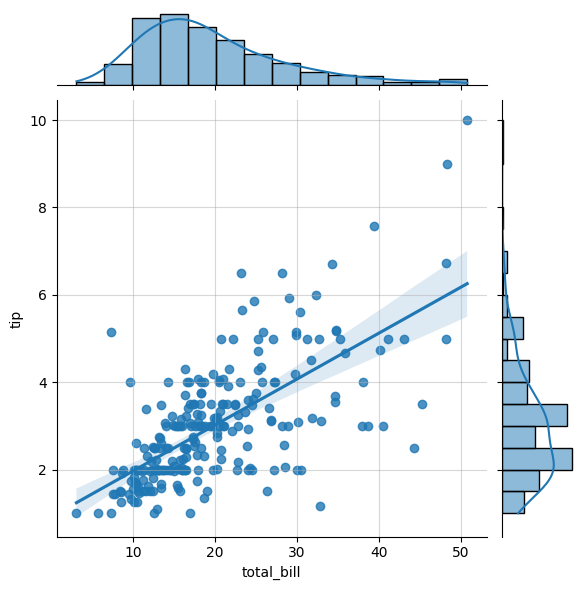

In [13]:
x = tips.total_bill
y = tips.tip
# Compute correlation
print("Correlation is: {:.3f}".format(tips['total_bill'].corr(tips['tip'])))

g = sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")
_ = g.ax_joint.grid(alpha=0.5)

#### Discussion (feature selection)
> What will you do if you find two correlative variables? Delete them? Keep them? It depends!

<center>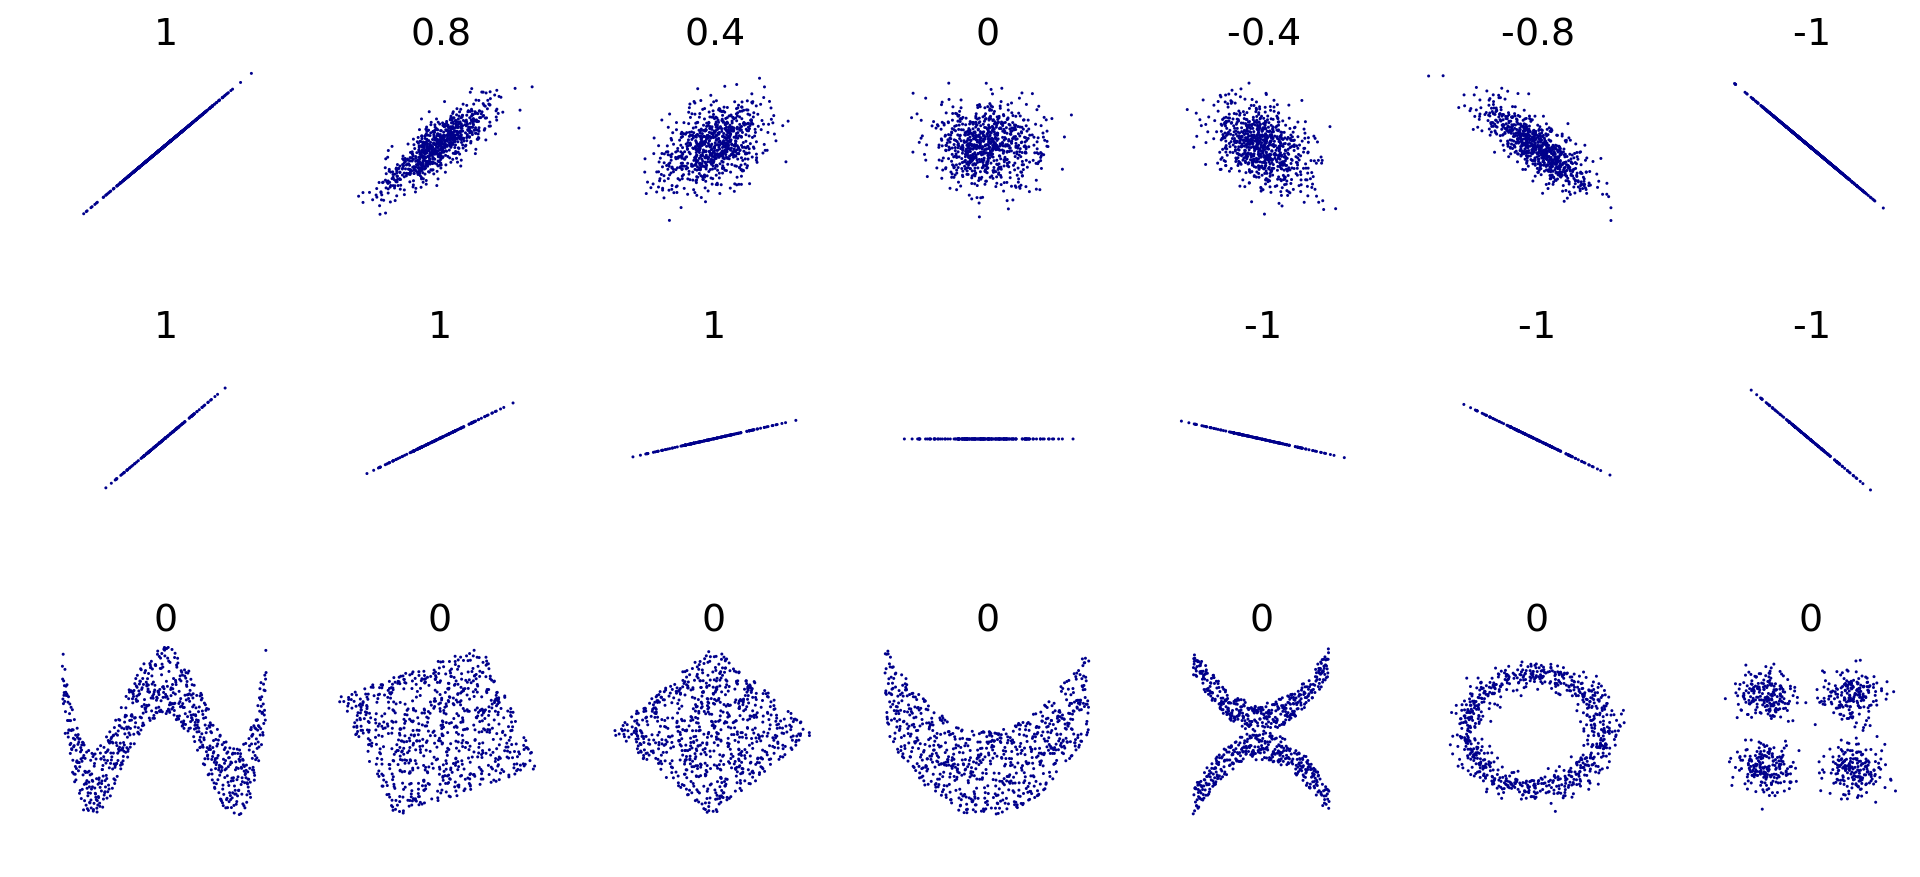</center>


## Correlation between continuous variables in `tips`

In [14]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


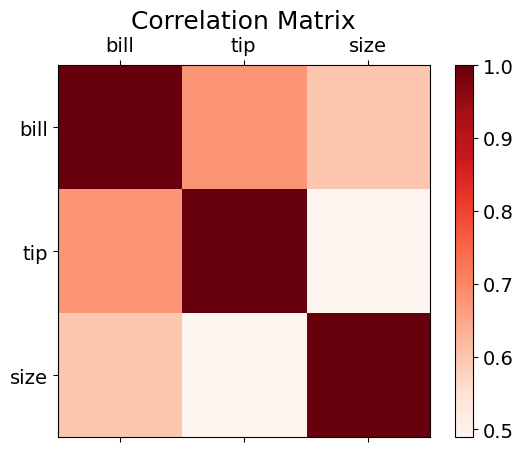

In [15]:
f = plt.figure()
plt.matshow(tips.corr(numeric_only=True), fignum=f.number, cmap='Reds')
plt.xticks(range(3), ['bill', 'tip', 'size'], fontsize=14)
plt.yticks(range(3), ['bill', 'tip', 'size'], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
_ = plt.title('Correlation Matrix', fontsize=18)

***

## Bi-Variate Analysis of 2 Categorical Variables
1. Two-way table
1. Stacked Bar Chart
1. Statistical tests like Chi-square (out of scope)

## Examples of Bi-Variate Analysis in `tips`

In [16]:
print(tips.groupby('time')['smoker'].value_counts(normalize=True))
pd.crosstab(tips['time'], tips['smoker'])

time    smoker
Lunch   No        0.661765
        Yes       0.338235
Dinner  No        0.602273
        Yes       0.397727
Name: proportion, dtype: float64


smoker,Yes,No
time,,
Lunch,23,45
Dinner,70,106


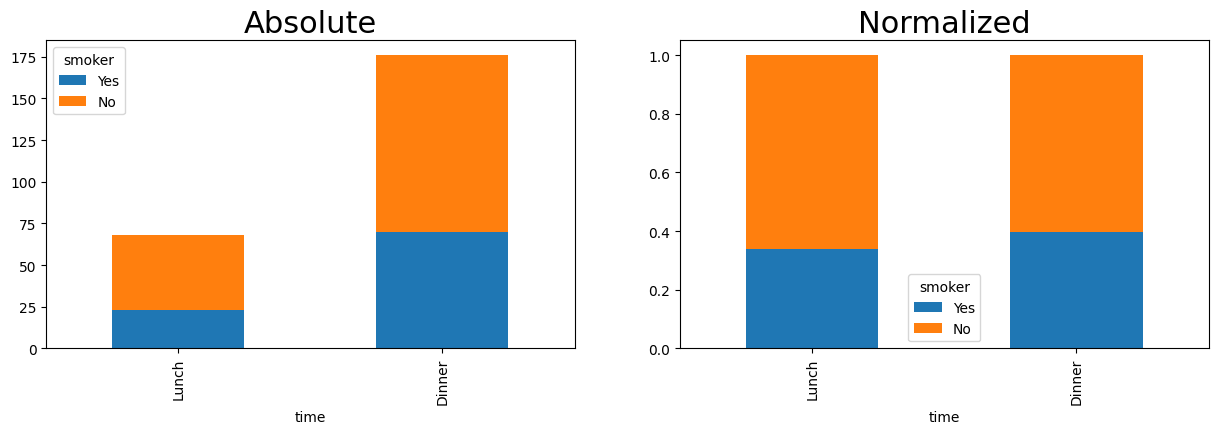

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,4))
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax1.set_title("Absolute", fontsize=22)
ax2.set_title("Normalized", fontsize=22)
_ = pd.crosstab(tips['time'], tips['smoker']).plot(kind='bar', stacked=True, ax=ax1)
_ = pd.crosstab(tips['time'], tips['smoker'], normalize="index").plot(kind='bar', stacked=True, ax=ax2)

***

## Analysis of Categorical and Continuous with Box plots

<img style="max-width:70%; margin: 10px auto" src="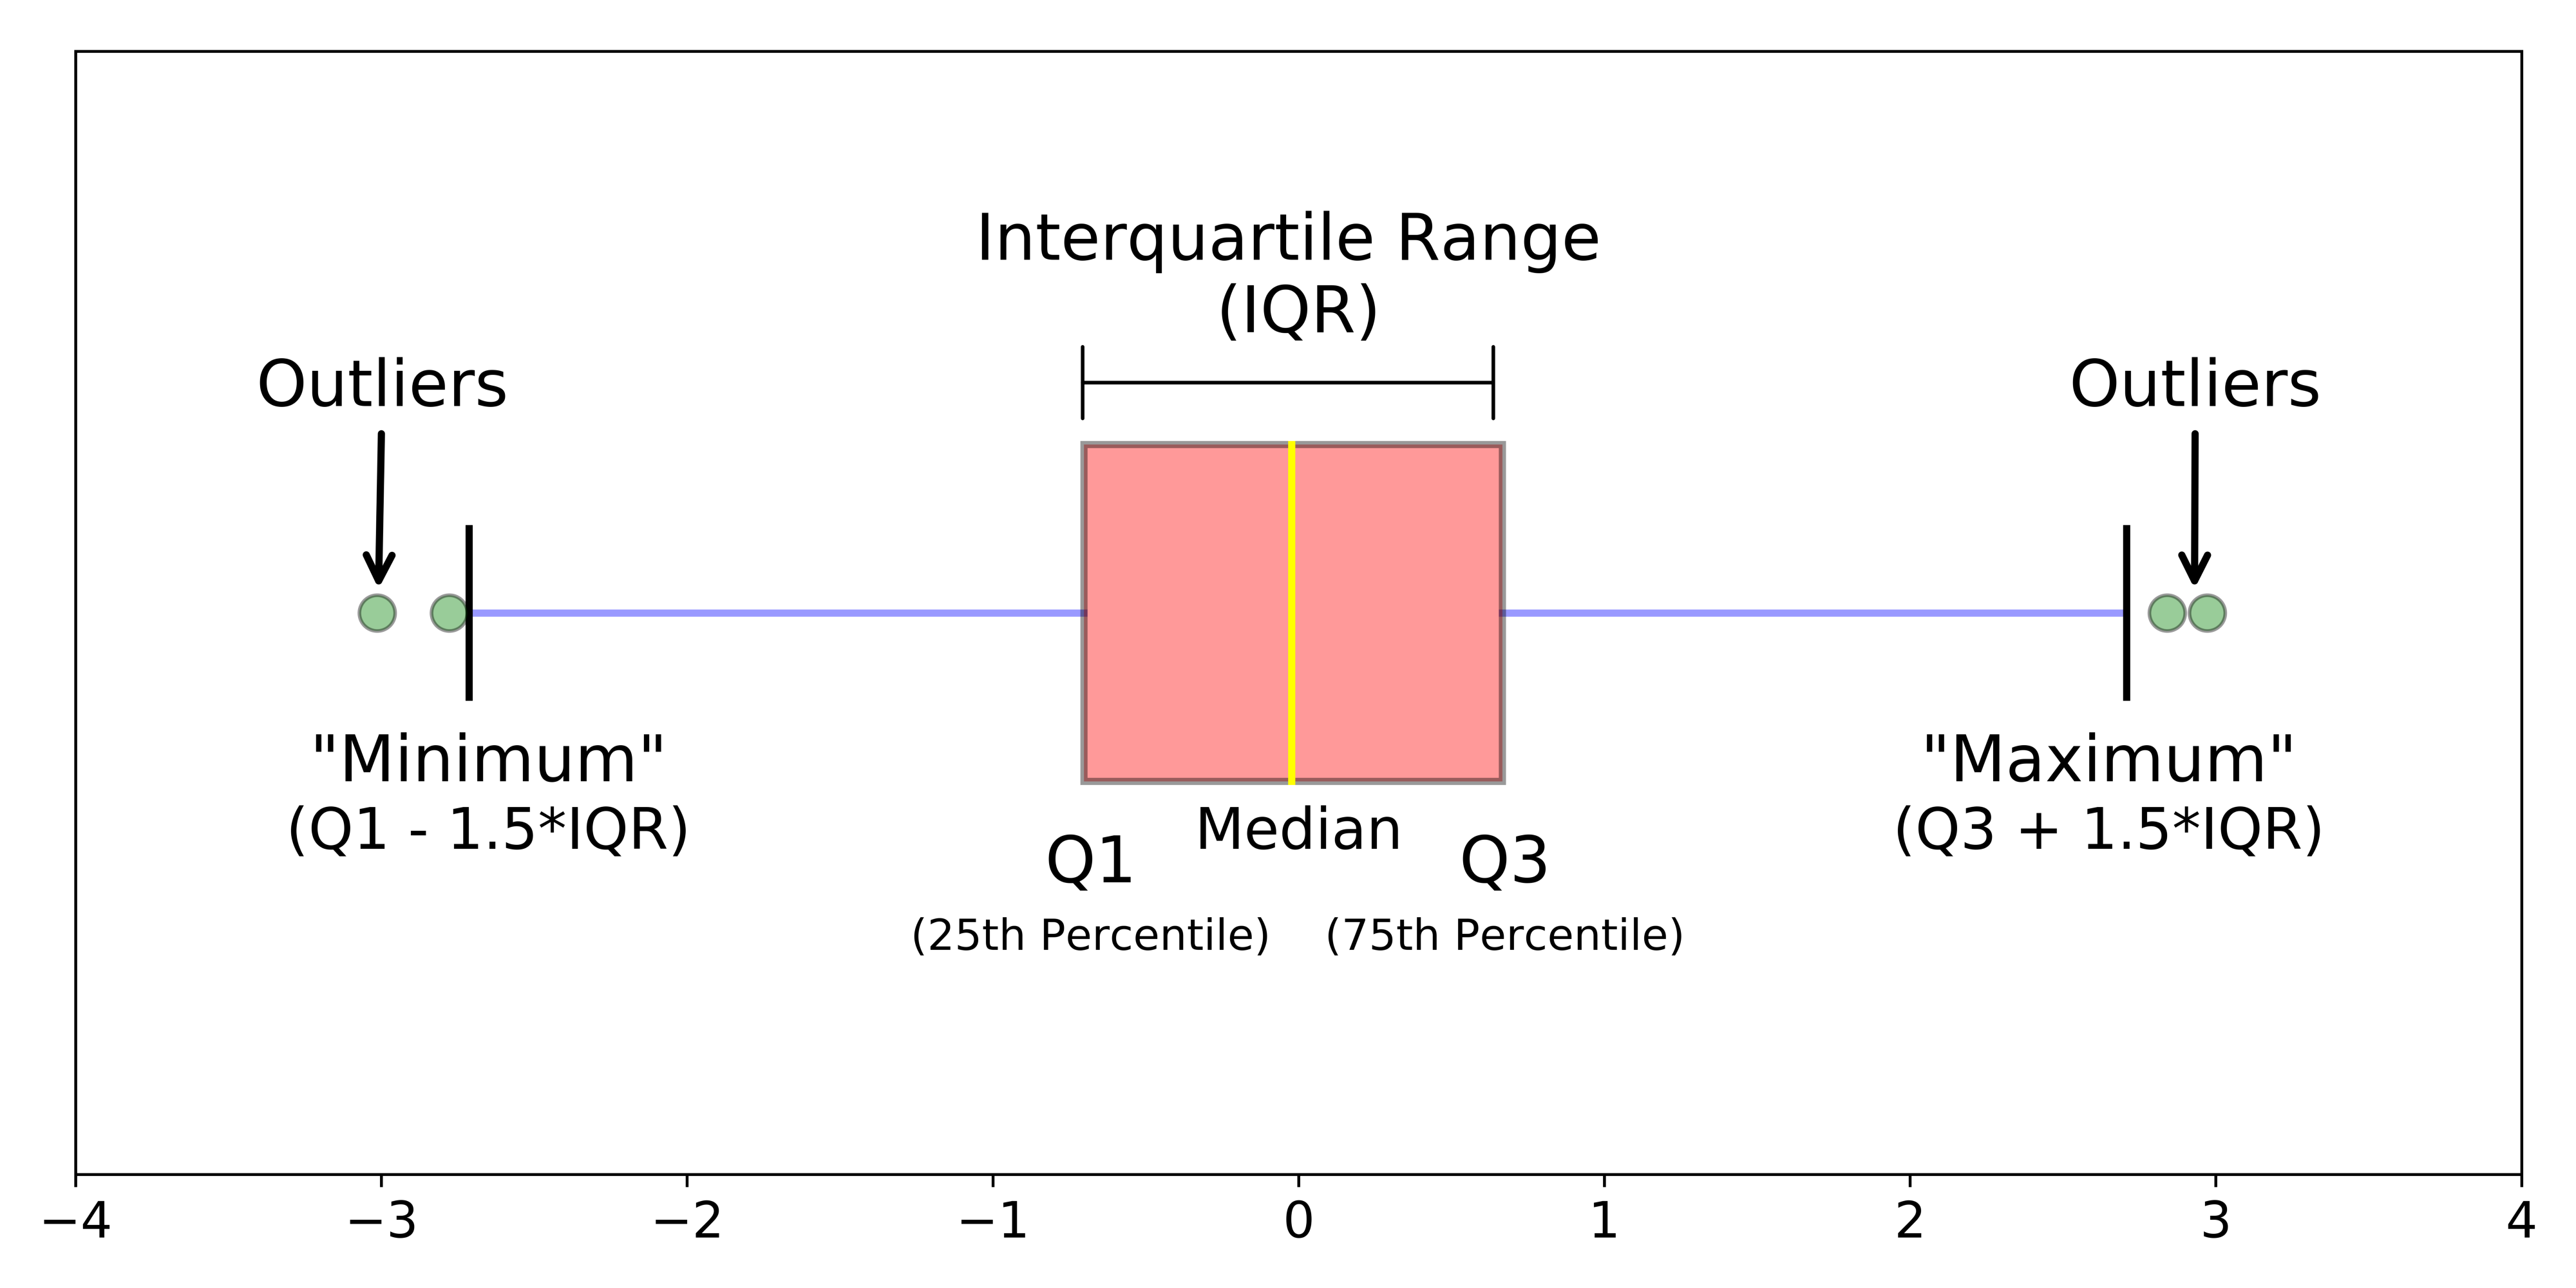
"/>
<center><small>Credit: <a href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51">towards data science</a></small></center>

## Box Plots in `tips`

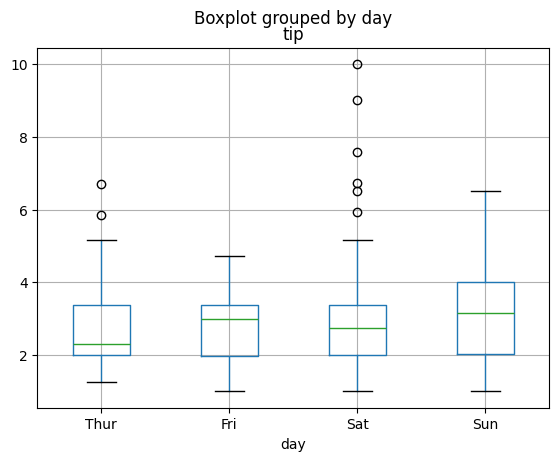

In [18]:
# _ = tips.boxplot(by='time', column='tip', grid=True)
_ = tips.boxplot(by='day', column='tip', grid=True)

***

## (Bonus) Creating New Variables
* Use expert/common knowledge to improve the data
* E.g. Humans like round numbers so customers tend to round the payment
> Can we design a variable that emphasizes this?

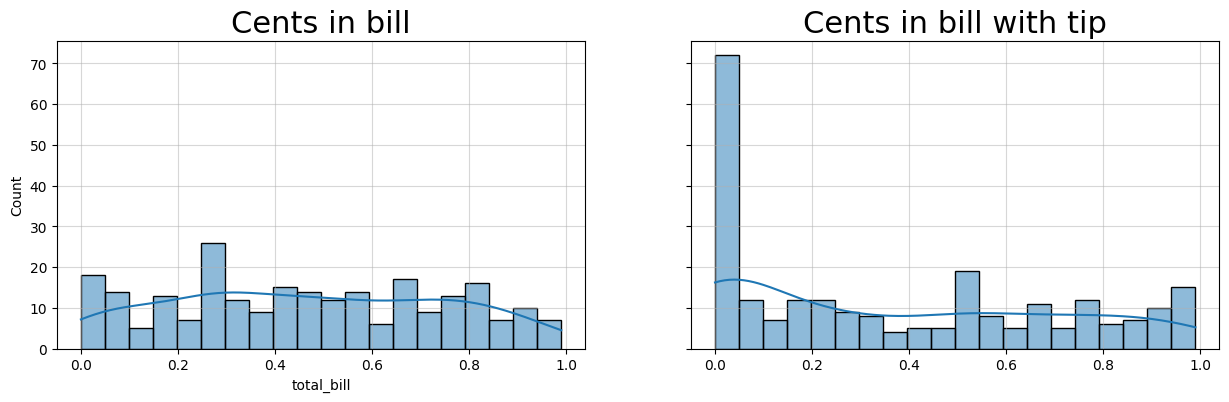

In [19]:
bill_with_tip = tips['total_bill'] + tips['tip']

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,4))

sns.histplot((tips.total_bill - np.floor(tips.total_bill)), ax=ax1, kde=True, bins=20)
ax1.set_title("Cents in bill", fontsize=22)

sns.histplot(bill_with_tip - np.floor(bill_with_tip), ax=ax2, kde=True, bins=20)
ax2.set_title("Cents in bill with tip", fontsize=22)

_ = ax1.grid(alpha=0.5), ax2.grid(alpha=0.5)